## Realizando minha própria analise exploratória

Essa base de dados contém dados que simulam uma base de dados de uma empresa que contém informações da conta de seus clientes como o Id, Score, Estado onde esta a conta, Idade, Patrimonio, Saldo, Produtos, se ele esta com a conta ativa ou se fechou a conta (que esta com status "Saiu"), se tem cartão de crédito e o Salário.

Como essa base foi usada para me ensinar como funciona uma limpeza de dados, eu vou fazer a limpeza dos dados e depois realizar uma análise exploratória para entender mais afundo os dados da base.

A sequência dos nomes das colunas da base é **["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]**
                    
### E as regras de dóminio da Empresa explicadas na aula:
- Estados da Região sul:
    - Paraná (PR)
    - Santa Catarina (SC)
    - Rio Grande do Sul (RS)
- Idade de 0 - 120

In [1]:
# Importando as bibliotecas que seram usadas para a limpeza e tratamento dos dados e posteriormente e análise explorátoria
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importando base de dados
base = pd.read_csv('churn.csv', sep=';')

# visualizando a base
base.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
# Arrumando o nome das colunas
nome_col = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito", "Ativo","Salario","Saiu"]
base.columns = nome_col
# visualizando resultado
base.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# Procurando ver se tem alguma coluna com valores nulos e o tamanho da base.
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [5]:
# Vendo a quantidade de valores nulos tem cada coluna.
base.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

**Colunas com valores nulos são (Genero com 8 valorores nulos e Salário com 7 valores nulos)**

In [6]:
# Tratando da coluna Genero primeiro.
genero = base.groupby(['Genero']).size()
genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [7]:
# Além de valores nulos a coluna apresenta valores que tem mesmo significado representados de forma diferentes.
# Tratando os valores
base.loc[(base['Genero'] == 'F') | (base['Genero'] == 'Fem'), 'Genero'] = 'Feminino' 

In [8]:
base.loc[base['Genero'] == 'M', 'Genero'] = 'Masculino' 

In [9]:
genero = base.groupby(['Genero']).size()
genero

Genero
Feminino     464
Masculino    527
dtype: int64

In [10]:
# Tratando valores nulos da coluna
# Preenchendo valores nulos como Masculino porque é a moda da coluna Genero
base['Genero'].fillna('Masculino', inplace=True)

In [11]:
# Verificando resultado 
base['Genero'].isnull().sum()

0

In [12]:
genero = base.groupby(['Genero']).size()
genero

Genero
Feminino     464
Masculino    535
dtype: int64

In [13]:
# Tratando a coluna Salario
base['Salario'].isnull().sum()

7

In [14]:
base['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

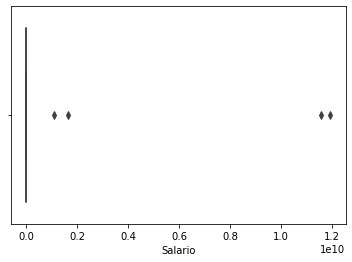

In [15]:
# Conhecendo melhor os dados da coluna com boxplot
srn.boxplot(x=base['Salario']);

In [16]:
# Identificando outliers
desvio = base['Salario'].std()
desvio

530579988.30111176

In [17]:
base.loc[base['Salario'] >= 2*desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [18]:
# 4 Valores como mostra o boxplot
mediana = base['Salario'].median()
mediana

8703249.5

In [19]:
# Usando a mediana que é uma medida central mais confiavel para substituir no valores nulos e outliers
base.fillna(mediana, inplace=True)

In [20]:
base.loc[base['Salario'] >= 2*desvio, 'Salario'] = mediana

In [21]:
base['Salario'].isnull().sum()

0

In [22]:
base.loc[base['Salario'] >= 2*desvio]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [23]:
# Checando por valores duplicados
base[base.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [24]:
# Eliminando dados duplicados
base.drop_duplicates(subset='Id', keep='first', inplace=True)

In [25]:
base[base.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [26]:
# Explorando e tratando os dados 
base['Idade'].describe()

count    998.000000
mean      38.907816
std       11.406570
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

**Vemos que a coluna Idade tem valores que não são consistentes porque não existem pessoas com idade menor que 0 ou com 140.**
**Como vemos na descrição estatística o menor valor -20 e maior valor 140.**

In [27]:
# vendo quantos cadastros temos com idade menor que 0 e maior que 120 
base.loc[(base['Idade'] < 0) | (base['Idade'] >= 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [28]:
# mediana que irá substituir os valores a serem consertados.
mediana_idade = base['Idade'].median()
mediana_idade

37.0

In [29]:
# substituindo os valores pela mediana
base.loc[(base['Idade'] < 0) | (base['Idade'] >= 120), 'Idade'] = mediana_idade

In [30]:
# Verificando se deu certo
base.loc[(base['Idade'] < 0) | (base['Idade'] >= 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [31]:
base['Idade'].describe()

count    998.000000
mean      38.908818
std       10.676642
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

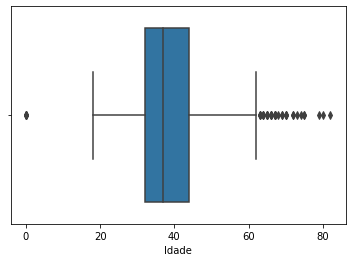

In [32]:
srn.boxplot(x=base.Idade);

In [33]:
# Vendo a coluna de Estados
estados = base.groupby(['Estado']).size()
estados

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [34]:
# Estados fora da regra (RP, TD, SP)
# Substituindo estados fora da regra de negocio pela moda da coluna
base.loc[base['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'

In [35]:
estados = base.groupby(['Estado']).size()
estados

Estado
PR    257
RS    483
SC    258
dtype: int64

In [36]:
base.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

# Realizando minha Análise exploratoria depois de tratar todos os dados.

In [37]:
base.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


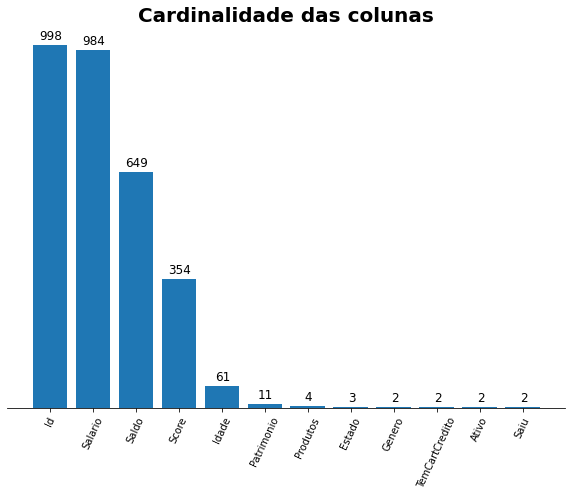

In [108]:
# Checando a cardinalidade das colunas
fig, ax = plt.subplots(figsize=(10,7))

x = base.nunique().sort_values(ascending=False).index
y = base.nunique().sort_values(ascending=False).values

ax.bar(x, y)

ax.set_title('Cardinalidade das colunas',
             ha='center',
            fontweight='bold',
            fontsize=20)

# Ajustando Gráfico tirando linhas e valores no eixo y e borda do gráfico
ax.yaxis.set_visible(False) # Visibilidade
ax.spines[['top','right','left']].set_visible(False) # Borda do gráfico
ax.set_yticks([0,1000]) # Tamanho do eixo y

# Mostrando valores em cima das barras
for i in range(len(x)):
    ax.annotate('{}'.format(y[i]),
                (x[i], y[i]), 
                ha='center',xytext=(1,6), 
                textcoords='offset points', fontsize=12,
                fontweight='normal')

ax.tick_params(axis='x' ,labelrotation=65)

plt.show()

- **Vemos que Id, Salario são colunas com alta cardinalidade.**
- **As colunas Saldo e Score tem um pouco menos de cardinalidade.**
- **Já as colunas de Idade em diante tem menos cardinalidade.**

- A coluna Id seria como se fosse o numero de cadastro de cada Cliente.
- A Salario seria o Salario de cada cliente e tem muita cardinalidade ou seja os valores são próximos de serem únicos.
- A coluna Saldo tem bem menos cardinalidade o que significa que tem mais pessoas com o mesmo valor de saldo.
- Score ja apresenta uma cardinalidade menor que a coluna de saldo ou seja o número de pessoas com mesmo valor de Score é maior que o número de pessoas com mesmo valor de saldo.
- Idade pouca Cardinalidade o que parece ter uma grande quantidade de pessoas com a mesma faixa etária.
- Patrimônio tem maior concentração de pessoas com mesmo valor que a concentração de pessoas com a mesma faixa étaria, o que pode significar que apesar da idade, salário, saldo e score as pessoas parecem ter o mesmo valor de patrimônio.
- Da coluna Produtos em diante os valores são restringidos a poucas opções sendo:
    - Produtos até 4.
    - Estado apenas 3.
    - Genero 2.
    - TemCartCredito, Ativo e Saiu valores booleanos 1 positivo e 0 negativo.

## Vamos mais afundo em cada Coluna. Vendo o volume de pessoas que sairam. 

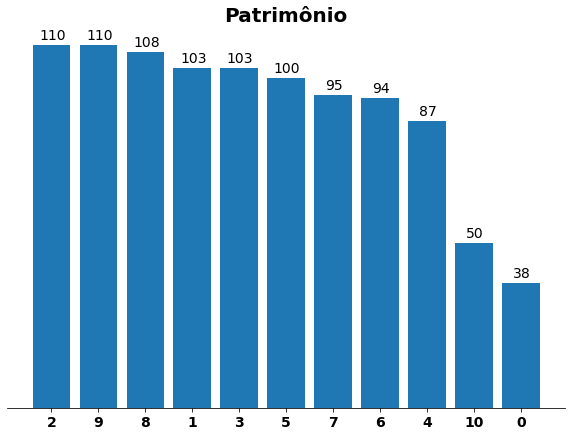

In [173]:
# Quantidade de pessoas que possuem 1 ou mais Patrimonios e pessoas que não possuem patrimonios.
# Checando a Patrimônio
fig, ax = plt.subplots(figsize=(10,7))

x = base['Patrimonio'].value_counts().index.astype('str')
y = base['Patrimonio'].value_counts().values


ax.bar(x, y)

ax.set_title('Patrimônio',
             ha='center',
            fontweight='bold',
            fontsize=20)

# Ajustando Gráfico tirando linhas e valores no eixo y e borda do gráfico
ax.yaxis.set_visible(False) # Visibilidade
ax.spines[['top','right','left']].set_visible(False) # Borda do gráfico
ax.set_yticks([0,15]) # Tamanho do eixo y

# Mostrando valores em cima das barras
for i in range(len(x)):
    ax.annotate('{}'.format(y[i]),
                (x[i], y[i]), 
                ha='center',xytext=(1,6), 
                textcoords='offset points', fontsize=14,
                fontweight='normal')

ax.xaxis.set_ticks(np.arange(len(x)))
ax.set_xticklabels(x,fontweight='bold')
ax.tick_params(axis='x', labelsize=14)

plt.show()

- **Interessante que a quantidade de pessoas que tem 2 patrimônios é a mesma de pessoas que possuem 9 e tem mais pessoas que possuem 2, 9 ou 8 patrimônios do que pessoas que possuem apenas 1 patrimônio.**
- **A quantidade de pessoas que possuem 1 patrimônio é a mesma de pessoas que possuem 3.**

In [178]:
base.groupby(['Estado']).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

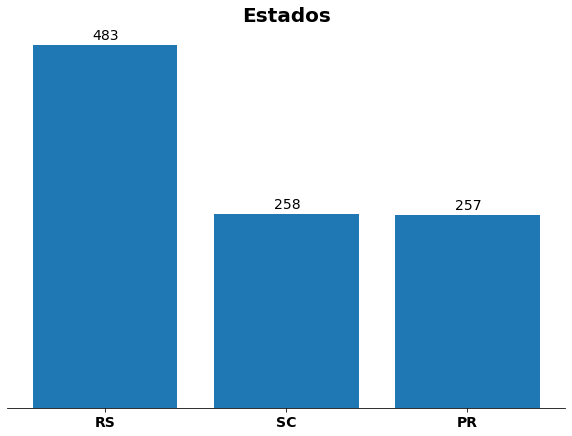

In [175]:
# Quantidade de Clientes por estado represantado gráficamente.

fig, ax = plt.subplots(figsize=(10,7))

x = base['Estado'].value_counts().index
y = base['Estado'].value_counts().values


ax.bar(x, y)

ax.set_title('Estados',
             ha='center',
            fontweight='bold',
            fontsize=20)

# Ajustando Gráfico tirando linhas e valores no eixo y e borda do gráfico
ax.yaxis.set_visible(False) # Visibilidade
ax.spines[['top','right','left']].set_visible(False) # Borda do gráfico
ax.set_yticks([0,15]) # Tamanho do eixo y

# Mostrando valores em cima das barras
for i in range(len(x)):
    ax.annotate('{}'.format(y[i]),
                (x[i], y[i]), 
                ha='center',xytext=(1,6), 
                textcoords='offset points', fontsize=14,
                fontweight='normal')

ax.xaxis.set_ticks(np.arange(len(x)))
ax.set_xticklabels(x,fontweight='bold')
ax.tick_params(axis='x', labelsize=14)

plt.show()

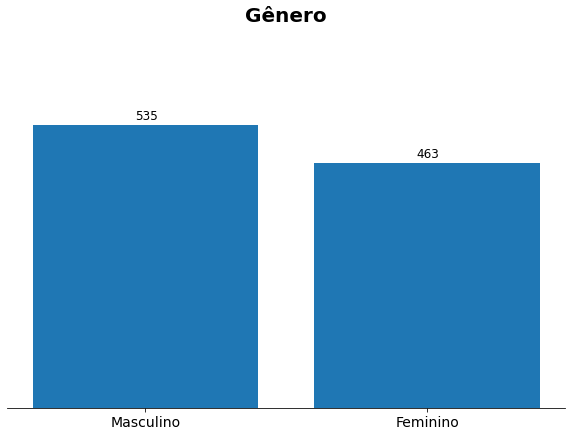

In [174]:
# Represantando Graficamente quantidade de Homens e mulheres.

fig, ax = plt.subplots(figsize=(10,7)) 

x = base['Genero'].value_counts().index
y = base['Genero'].value_counts().values

ax.bar(x, y)

ax.set_xticks(x)
ax.tick_params(axis='x', labelsize=14)
ax.set_yticks(y)


# ax.xaxis.set_ticks(np.arange(0,2))
# ax.set_xticklabels(['Ativo', 'Saiu'],fontweight='bold')
ax.set_xticks(x)
ax.tick_params(axis='x',labelsize=14)

# Titulo do gráfico
ax.set_title('Gênero',
             fontsize=20,
             fontweight='bold')

# Ajustando Gráfico tirando linhas e valores no eixo y e borda do gráfico
ax.yaxis.set_visible(False) # Visibilidade
ax.spines[['top','right','left']].set_visible(False) # Borda do gráfico
ax.set_yticks([0,720]) # Tamanho do eixo y


# Mostrando valores em cima das barras
for i in range(len(x)):
    ax.annotate('{}'.format(y[i]),
                (x[i], y[i]), 
                ha='center',xytext=(1,6), 
                textcoords='offset points', fontsize=12,
                fontweight='normal')

plt.show()

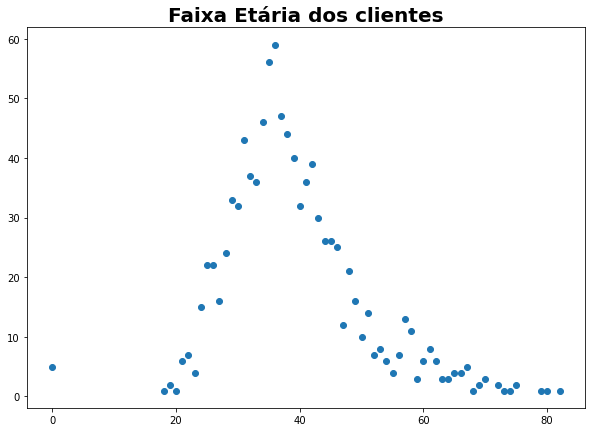

In [192]:
fig, ax = plt.subplots(figsize=(10,7))

x = base['Idade'].value_counts().index
y = base['Idade'].value_counts().values


ax.scatter(x, y)

ax.set_title('Faixa Etária dos clientes',
             ha='center',
            fontweight='bold',
            fontsize=20)


plt.show()

- **Pelo gráfico temos uma ideia de que há uma concentração maior de clientes com a idade entre 20 e 60 anos**

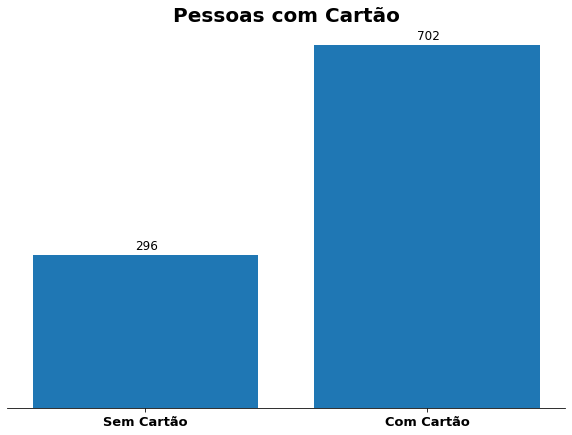

In [187]:
# Quantas pessoas tem Cartão de Crédito.
fig, ax = plt.subplots(figsize=(10,7)) 

x = base['TemCartCredito'].value_counts().index
y = base['TemCartCredito'].value_counts().values

ax.bar(x, y)

ax.set_xticks(x)
ax.tick_params(axis='x', labelsize=14)
ax.set_yticks(y)


ax.xaxis.set_ticks(np.arange(0,2))
ax.set_xticklabels(['Sem Cartão', 'Com Cartão'],fontweight='bold')
# ax.set_xticks(x) -> Ordem dos labels
ax.tick_params(axis='x',labelsize=13)

# Titulo do gráfico
ax.set_title('Pessoas com Cartão',
             fontsize=20,
             fontweight='bold')

# Ajustando Gráfico tirando linhas e valores no eixo y e borda do gráfico
ax.yaxis.set_visible(False) # Visibilidade
ax.spines[['top','right','left']].set_visible(False) # Borda do gráfico
ax.set_yticks([0,720]) # Tamanho do eixo y


# Mostrando valores em cima das barras
for i in range(len(x)):
    ax.annotate('{}'.format(y[i]),
                (x[i], y[i]), 
                ha='center',xytext=(1,6), 
                textcoords='offset points', fontsize=12,
                fontweight='normal')

plt.show()

In [206]:
base.head(1)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1


- Vemos um valor estranho na primeiro linha, o cliente na coluna Ativo esta positivo, porém coluna Saiu esta negativo. 

- **Vendo quanto clientes estão como ativos e quantos sairam**

In [207]:
base[base['Saiu']==1].shape

(203, 12)

- **Temos 203 clientes que sairam**

In [208]:
base[base['Ativo']==1].shape

(509, 12)

- **Temos 509 clientes que estão como ativo**

- **Os valores de clientes que sairam não completa com os valores de clientes ativos ou seja á uma inconsistencia nos dados de quem saiu e quem esta ativo ou as 2 coluna parecem não ter ligação**

In [211]:
# Vendo quantos cadastro aparecem que esta ativo e saiu.
base.loc[(base['Saiu']==1) & (base['Ativo']==1)].shape

(61, 12)

In [213]:
# Vendo quantos cadastros aparecem que não esta ativo e não saiu.
base.loc[(base['Saiu']==0) & (base['Ativo']==0)].shape

(347, 12)

In [220]:
base2 = base.iloc[:,1:]

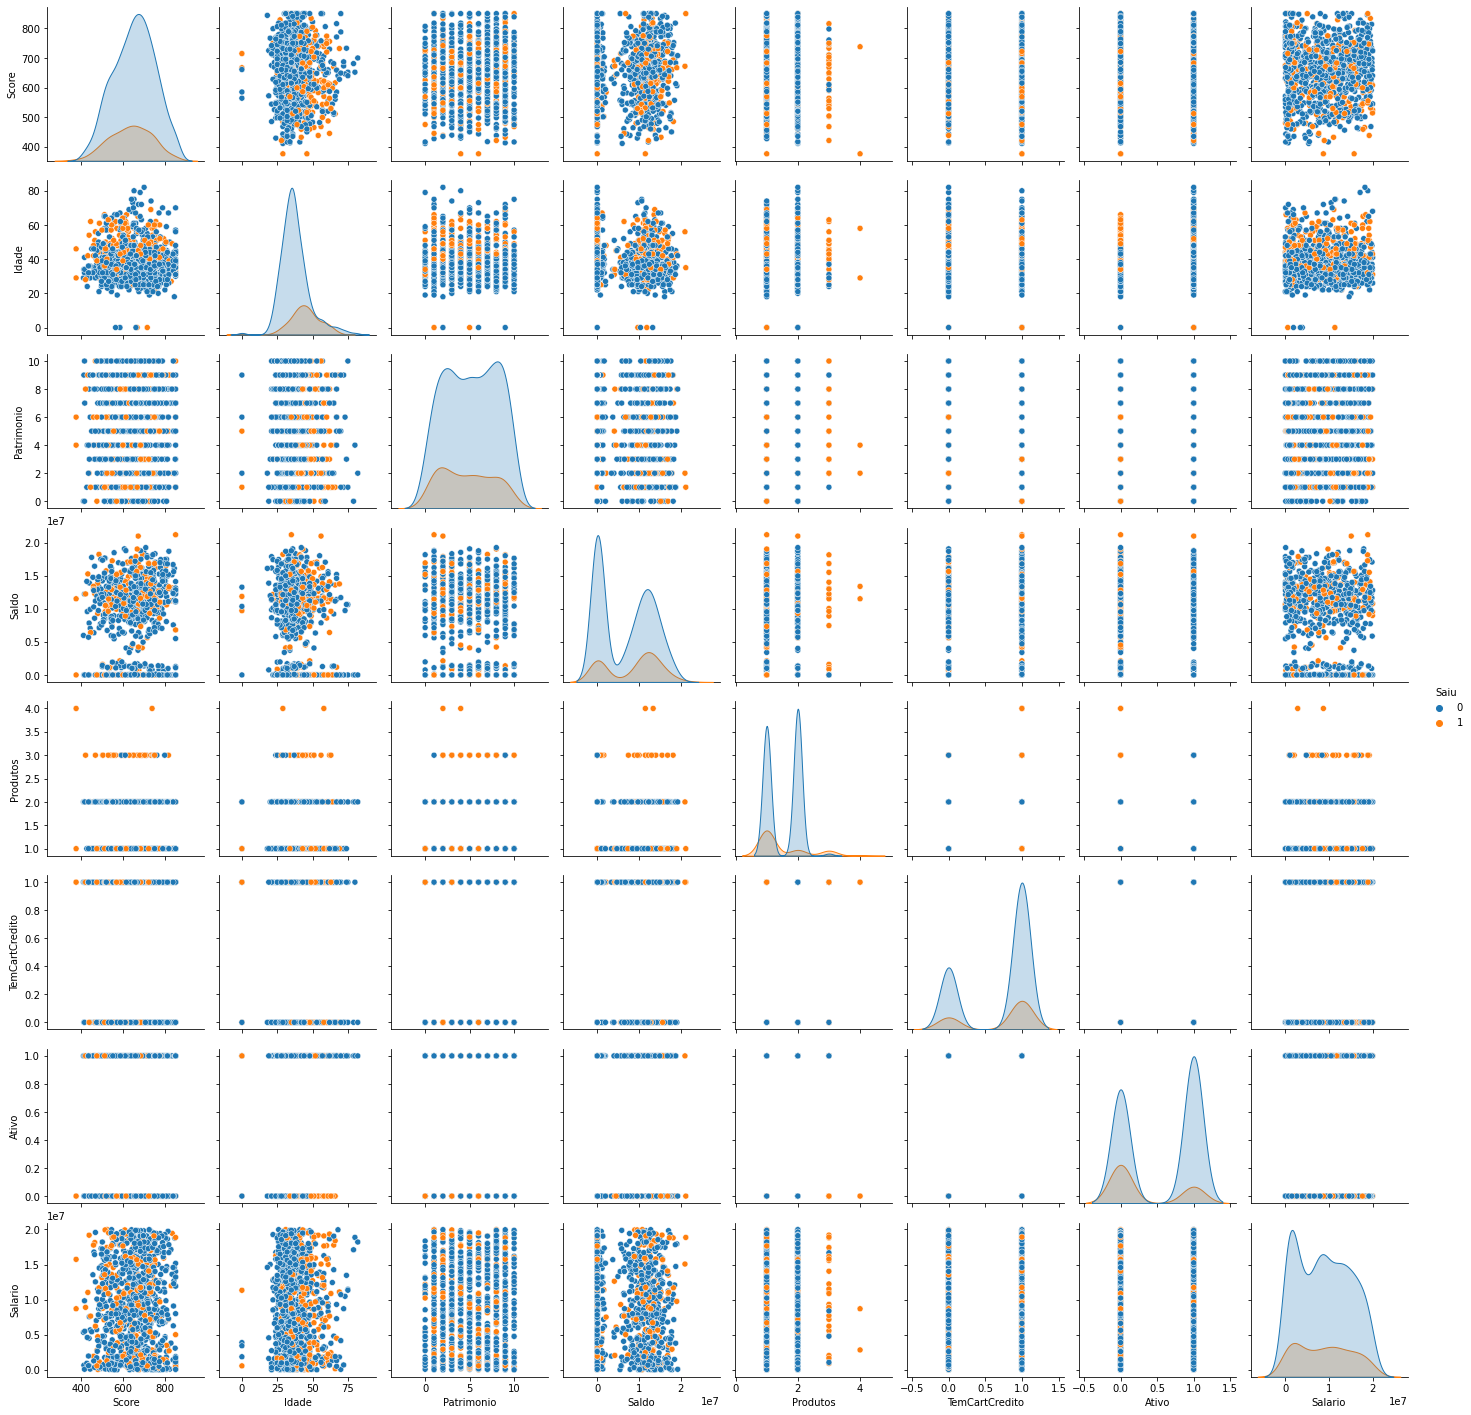

In [222]:
srn.pairplot(base2, hue='Saiu');

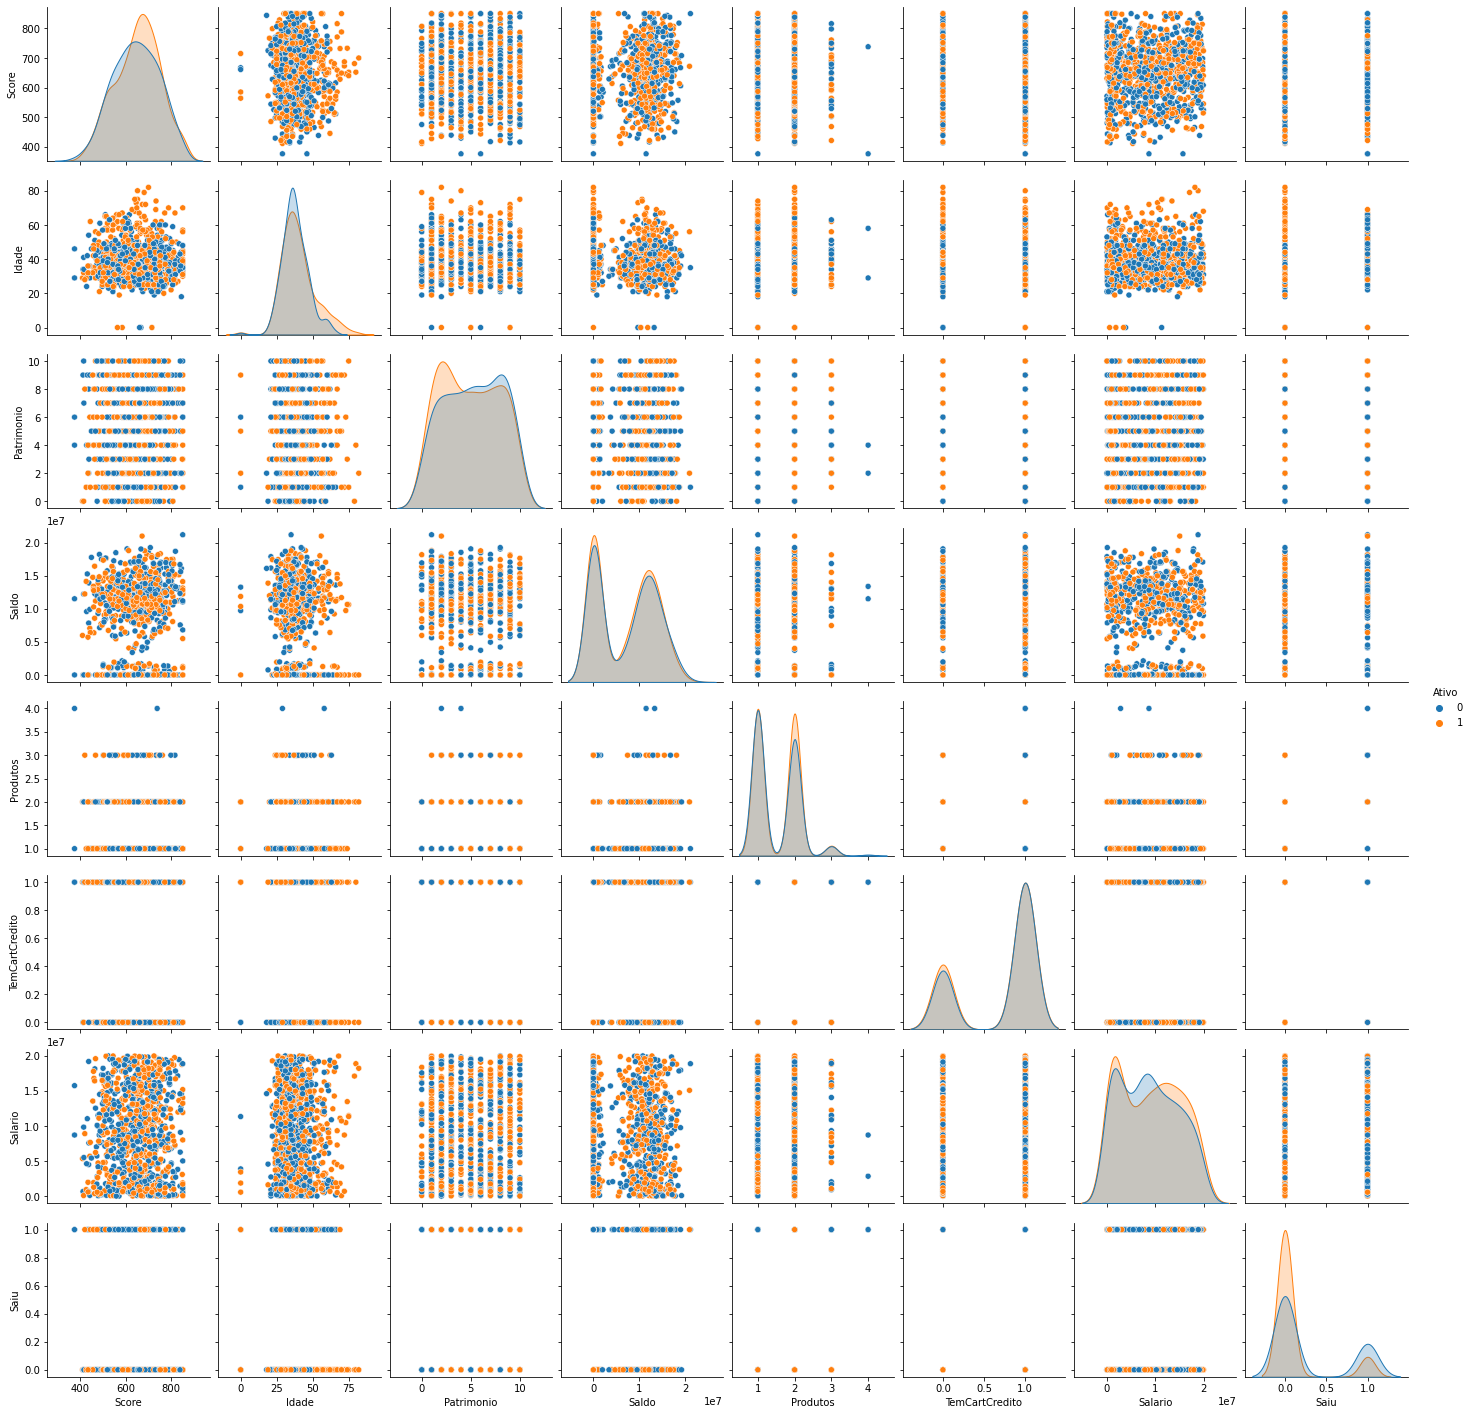

In [223]:
srn.pairplot(base2, hue='Ativo');

### Quantas pessoas que Sairam tem saldo igual a 0?

In [39]:
qtd_saldoZ = base.loc[(base['Saldo'] == 0) & (base['Saiu'] == 1)]
qtd_saldoZ.head(2)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
22,23,510,RS,Feminino,38,4,0,1,1,0,11891353.0,1


In [40]:
# 55 pessoas com saldo igual a 0 sairam
qtd_saldoZ.shape

(55, 12)

In [41]:
# Total de pessoas que sairam
total_saiu = base['Saiu'].sum()
total_saiu

203

**Práticamente 1 quarto das pessoas que sairam tinham saldo igual a 0**

In [42]:
# Qual valor minimo de salário? e quantas pessoas com valor minimo de salário sairam?
min_salario = base['Salario'].min()
min_salario

9677.0

In [43]:
base.loc[(base['Salario'] == min_salario) & (base['Saiu'] == 1)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


### Quantas pessoas com salario menor que a média e quantas pessoas com salário maior que a média sairam?

In [44]:
# Média de salario 
md_salario = base['Salario'].mean()
md_salario

8843092.051603206

In [45]:
menor_salario = base.loc[(base['Salario'] < md_salario) & (base['Saiu'] == 1)]
menor_salario.head(2)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,8703249.5,1
16,17,653,PR,Masculino,58,1,13260288,1,1,0,509767.0,1


In [46]:
# Quantidade de pessoas com salário abaixo da média sairam.
menor_salario.shape

(101, 12)

**101 pessoas com valor de salário abaixo da média sairam.**

In [47]:
maior_salario = base.loc[(base['Salario'] > md_salario) & (base['Saiu'] == 1)]
maior_salario.head(2)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1


In [48]:
# Quantidade de pessoas com salário acima da média sairam.
maior_salario.shape

(102, 12)

**102 pessoas com valor de salário acima da média sairam.**
- Parece que o valor do salario não tem ligação com a pessoa sair ou não.

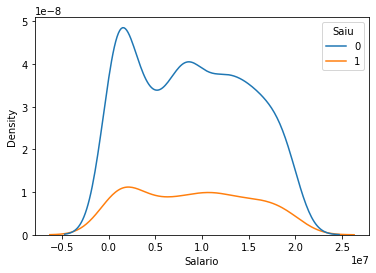

In [49]:
srn.kdeplot(base['Salario'], hue=base['Saiu'])
plt.show()

- **O gráfico mostra que apesar de ter uma quantidade grande de pessoas com salario igual a 0, a quantidade de pessoas que sairam não aumenta conforme o salário aumenta, então parece que o valor do salario não tem ligação com a pessoar deixar ou não de ser cliente**

### Quantas pessoas que tem cartão de credito sairam e quantas não tinha e sairam?

In [50]:
# Juntando clientes que tem cartão de crédito e sairam.
tem_cartao = base.loc[(base['TemCartCredito'] == 1) & (base['Saiu'] ==1)]
tem_cartao.head(2)

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1


In [51]:
# Quantidade de clientes que tem cartão de crédito e sairam.
tem_cartao.shape

(143, 12)

In [52]:
# Quantidade de clientes que não tem cartão de crédito e sairam.
nao_tem = base.loc[(base['TemCartCredito'] == 0) & (base['Saiu'] ==1)]
nao_tem.shape

(60, 12)

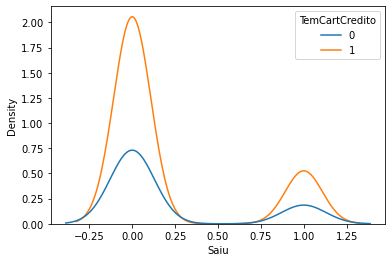

In [53]:
srn.kdeplot(base['Saiu'], hue=base['TemCartCredito'])
plt.show()

### Vendo pelo gráfico das pessoas que sairam, o volume de pessoas que tem cartão de crédito e sairam é maior que o volume de pessoas que não tem cartão e sairam. 
- **Parece que ter cartão de crédito tem alguma influencia com o cliente sair.**

In [67]:
# Quantas pessoas tem saldo 0 e tem Cartão. 
len(base[(base['Saldo'] == 0) & (base['TemCartCredito'] == 1)])

247

In [55]:
# Quantas pessoas que tem saldo 0 tem cartão e sairam.
qtd_saldoZ[qtd_saldoZ['TemCartCredito']==1].shape

(39, 12)

In [56]:
# Quantidade de pessoas que tem Saldo igual a 0 e sairam.
qtd_saldoZ.shape

(55, 12)

### - ***Representando com gráfico a base de pessoas com saldo igual a 0 e sairam, o volume de pessoas que tinham cartão vs pessoas não tinham.***

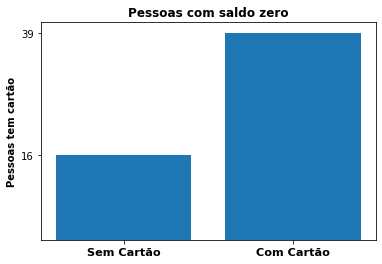

In [57]:
fig, ax = plt.subplots() 

x = qtd_saldoZ['TemCartCredito'].value_counts().index
y = qtd_saldoZ['TemCartCredito'].value_counts().values

ax.bar(x, y)

ax.set_xticks(x)
ax.tick_params(axis='x', labelsize=14)
ax.set_yticks(y)


ax.xaxis.set_ticks(np.arange(0,2))
ax.set_xticklabels(['Sem Cartão', 'Com Cartão'],fontweight='bold')
ax.tick_params(axis='x',labelsize=11.3)

ax.set_ylabel('Pessoas tem cartão', fontweight='bold')
ax.set_title('Pessoas com saldo zero', fontweight='bold')

plt.show()

- **Volume de pessoas que tem cartão é maior que a metade.**
- **Ou seja da base das pessoas que tinha saldo 0 e sairam** 

In [58]:
# Maior parte de quem tem cartão e saiu tinha 1 produto
tem_cartao['Produtos'].value_counts()

1    103
3     21
2     17
4      2
Name: Produtos, dtype: int64

In [59]:
saiu = base[base['Saiu']==1]

In [60]:
# Grande parte dos que sairam também tinha 1 produtos
saiu['Produtos'].value_counts()

1    141
2     32
3     28
4      2
Name: Produtos, dtype: int64

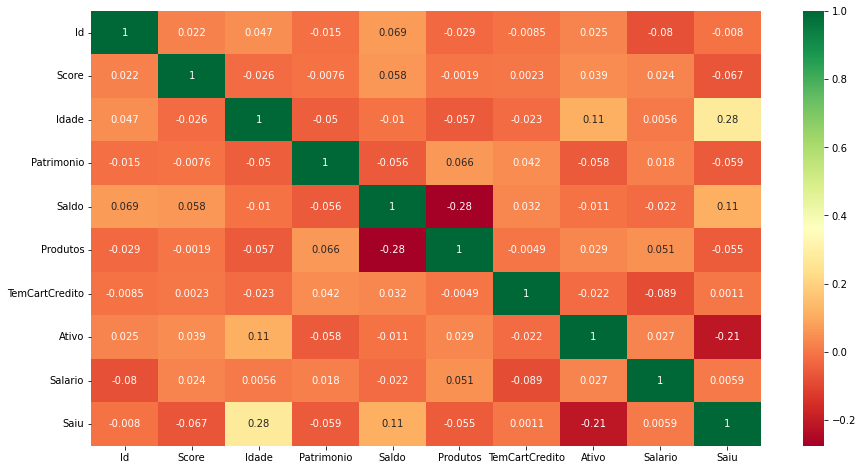

In [61]:
# Vendo se tem algum correlação entre Produtos e saiu 
plt.figure(figsize = (15,8))
srn.heatmap(base.corr(),annot=True,cmap='RdYlGn')
plt.show()

**Vendo o Gráfico a correlação entre Saiu e score é negativa ou seja quanto maior o numero de pessoas saindo menor o numero de score**

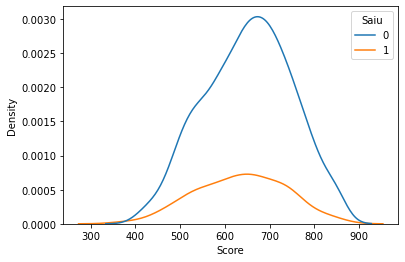

In [65]:
srn.kdeplot(base['Score'], hue=base['Saiu'])
plt.show()